# Problem Set 3 Munson

Below is a visualization of how the FED calculates inflation expectations from nominal yields vs tips yields.  TIPS are a "inflation protected" assets so generally pay a lower yield than nominal.  The principal of a TIPS bond appreciates with realized inflation calculated by the treasury.  This TIPS yield can be then thought of as a "real yield" since our principal will be inflation protected... thus using a simple FISHER equation i (nominal yield) = r (real yield) + πe (expected inflation) we can infer the markets inflation expectations.

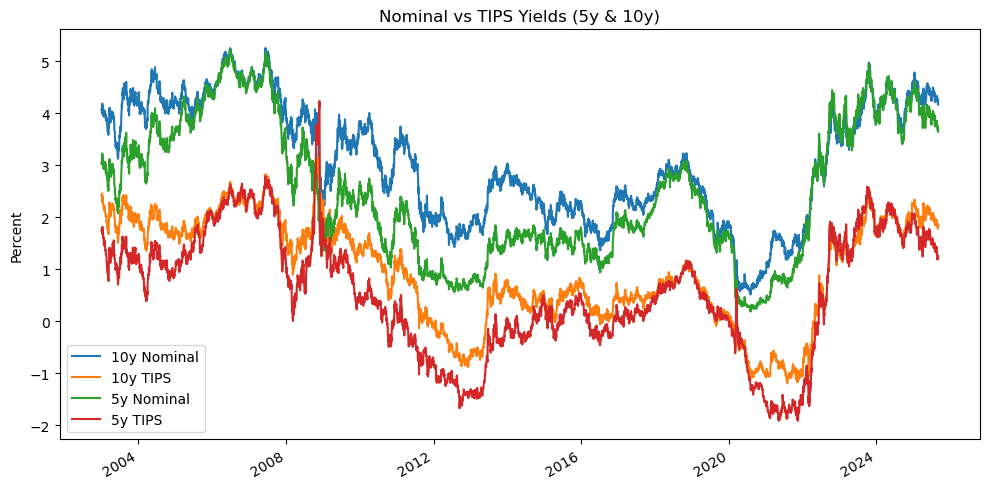

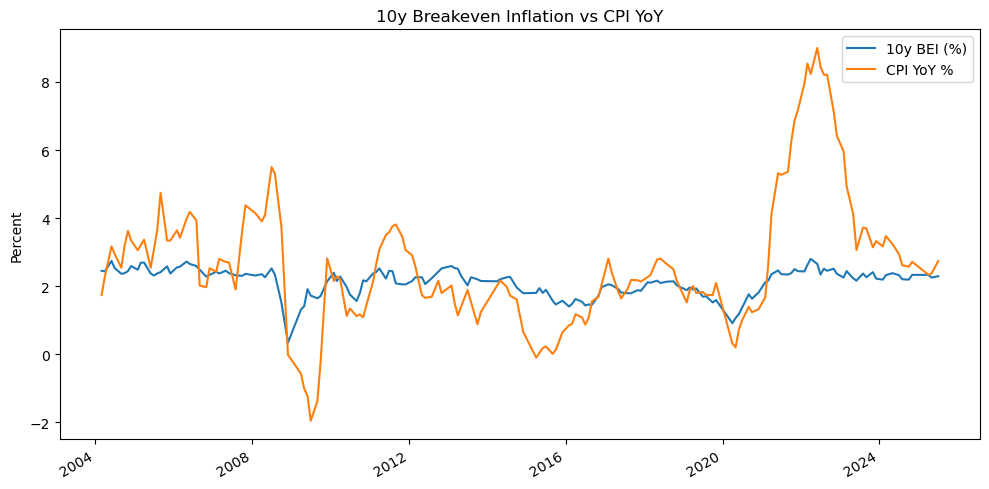

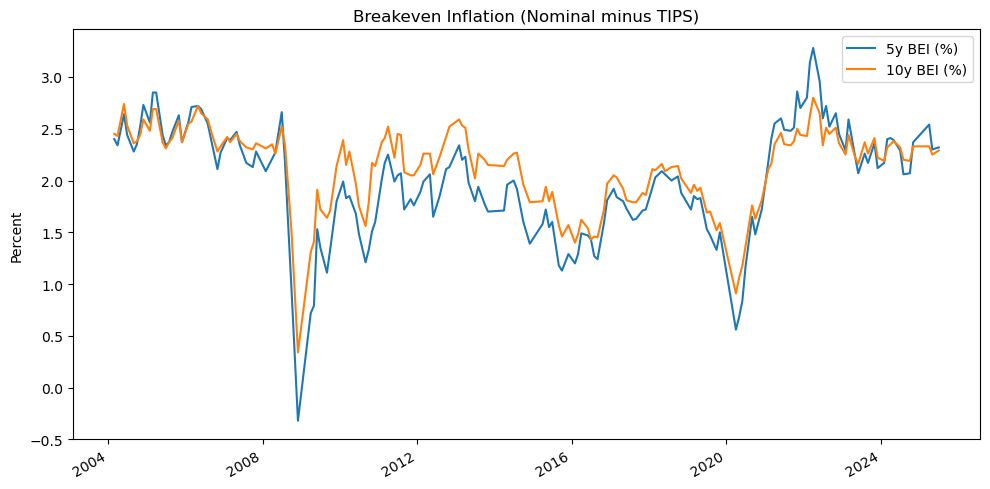

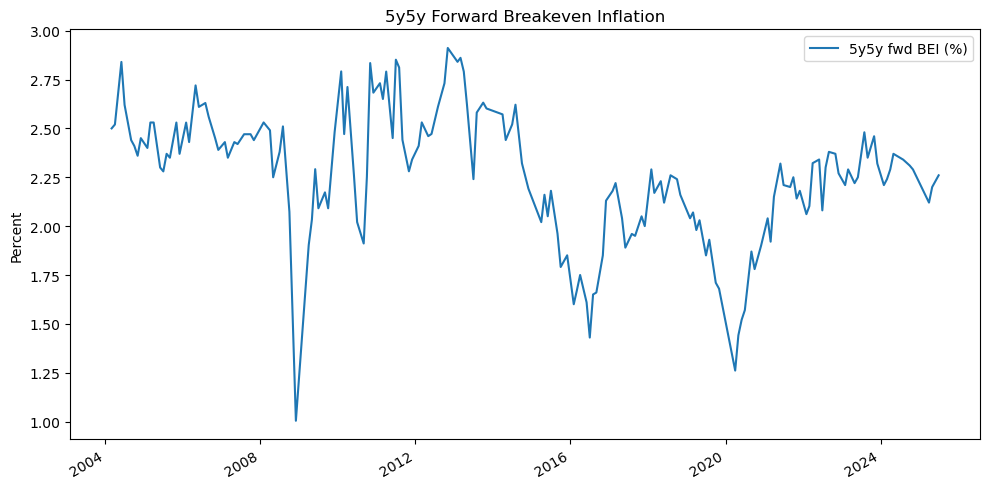

In [ ]:
# --- TIPS Breakeven Visualization (FRED) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime

START = "2003-01-01" # Tips Data starts 2003
END   = datetime.today().strftime("%Y-%m-%d")

# FRED series IDs
series = {
    "DGS5":   "5y nominal",
    "DFII5":  "5y TIPS",
    "DGS10":  "10y nominal",
    "DFII10": "10y TIPS",
    "CPIAUCSL": "CPI (Index)"
}

# Fetch data
yields = pdr.DataReader(list(series.keys()), "fred", START, END)

# Compute breakevens (in percentage points)
be5  = yields["DGS5"]  - yields["DFII5"]
be10 = yields["DGS10"] - yields["DFII10"]

# 5y5y forward breakeven (annualized, compounding approximation)
dec_be5  = be5  / 100.0
dec_be10 = be10 / 100.0
fwd_5y5y = ((1 + dec_be10)**10 / (1 + dec_be5)**5)**(1/5) - 1
fwd_5y5y = fwd_5y5y * 100.0  # back to percent

# CPI YoY for context (approx realized inflation)
cpi = yields["CPIAUCSL"].dropna()
cpiyoy = (cpi.pct_change(12) * 100).rename("CPI YoY %")

# Combine into one DataFrame
df = pd.concat([
    be5.rename("5y BEI (%)"),
    be10.rename("10y BEI (%)"),
    fwd_5y5y.rename("5y5y fwd BEI (%)"),
    cpiyoy
], axis=1).dropna()

# Plot raw nominal & TIPS yields (5y and 10y)
four = (
    yields[["DGS10", "DFII10", "DGS5", "DFII5"]]
    .rename(columns={
        "DGS10":  "10y Nominal",
        "DFII10": "10y TIPS",
        "DGS5":   "5y Nominal",
        "DFII5":  "5y TIPS",
    })
    .ffill()
    .dropna()
)

plt.figure(figsize=(10,5))
four.plot(ax=plt.gca())
plt.title("Nominal vs TIPS Yields (5y & 10y)")
plt.ylabel("Percent")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 10y BEI vs CPI YoY
plt.figure(figsize=(10,5))
df[["10y BEI (%)","CPI YoY %"]].plot(ax=plt.gca())
plt.title("10y Breakeven Inflation vs CPI YoY")
plt.ylabel("Percent")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 5y & 10y BEI
plt.figure(figsize=(10,5))
df[["5y BEI (%)","10y BEI (%)"]].plot(ax=plt.gca())
plt.title("Breakeven Inflation (Nominal minus TIPS)")
plt.ylabel("Percent")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 5y5y forward BEI
plt.figure(figsize=(10,5))
df[["5y5y fwd BEI (%)"]].plot(ax=plt.gca())
plt.title("5y5y Forward Breakeven Inflation")
plt.ylabel("Percent")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()
